# CS 584 Final Project

# Nikhil Deshpande( Leader)
# Ishan Khaparde
# Meenakshi Meenakshi

In [1]:
import numpy as np 
import pandas as pd 
import os
import cv2
import matplotlib.pyplot as plt
import glob
from matplotlib import gridspec
from sklearn.model_selection import train_test_split

import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(os.getcwd() + '/Dataset/sample/sample_labels.csv')
path_to_images = os.getcwd() + '/Dataset/sample/images'
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139,0.139
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168,0.168
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168,0.168
3,00000030_001.png,Atelectasis,1,30,079Y,M,PA,2992,2991,0.143,0.143
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168,0.168


In [3]:
list_images = glob.glob(os.path.join(path_to_images, "*.png"))
list_images[:10]

['C:\\Users\\ishan\\Study\\CS 584\\Project/Dataset/sample/images\\00000013_005.png',
 'C:\\Users\\ishan\\Study\\CS 584\\Project/Dataset/sample/images\\00000013_026.png',
 'C:\\Users\\ishan\\Study\\CS 584\\Project/Dataset/sample/images\\00000017_001.png',
 'C:\\Users\\ishan\\Study\\CS 584\\Project/Dataset/sample/images\\00000030_001.png',
 'C:\\Users\\ishan\\Study\\CS 584\\Project/Dataset/sample/images\\00000032_001.png',
 'C:\\Users\\ishan\\Study\\CS 584\\Project/Dataset/sample/images\\00000040_003.png',
 'C:\\Users\\ishan\\Study\\CS 584\\Project/Dataset/sample/images\\00000042_002.png',
 'C:\\Users\\ishan\\Study\\CS 584\\Project/Dataset/sample/images\\00000057_001.png',
 'C:\\Users\\ishan\\Study\\CS 584\\Project/Dataset/sample/images\\00000061_002.png',
 'C:\\Users\\ishan\\Study\\CS 584\\Project/Dataset/sample/images\\00000061_019.png']

# Data Visualization

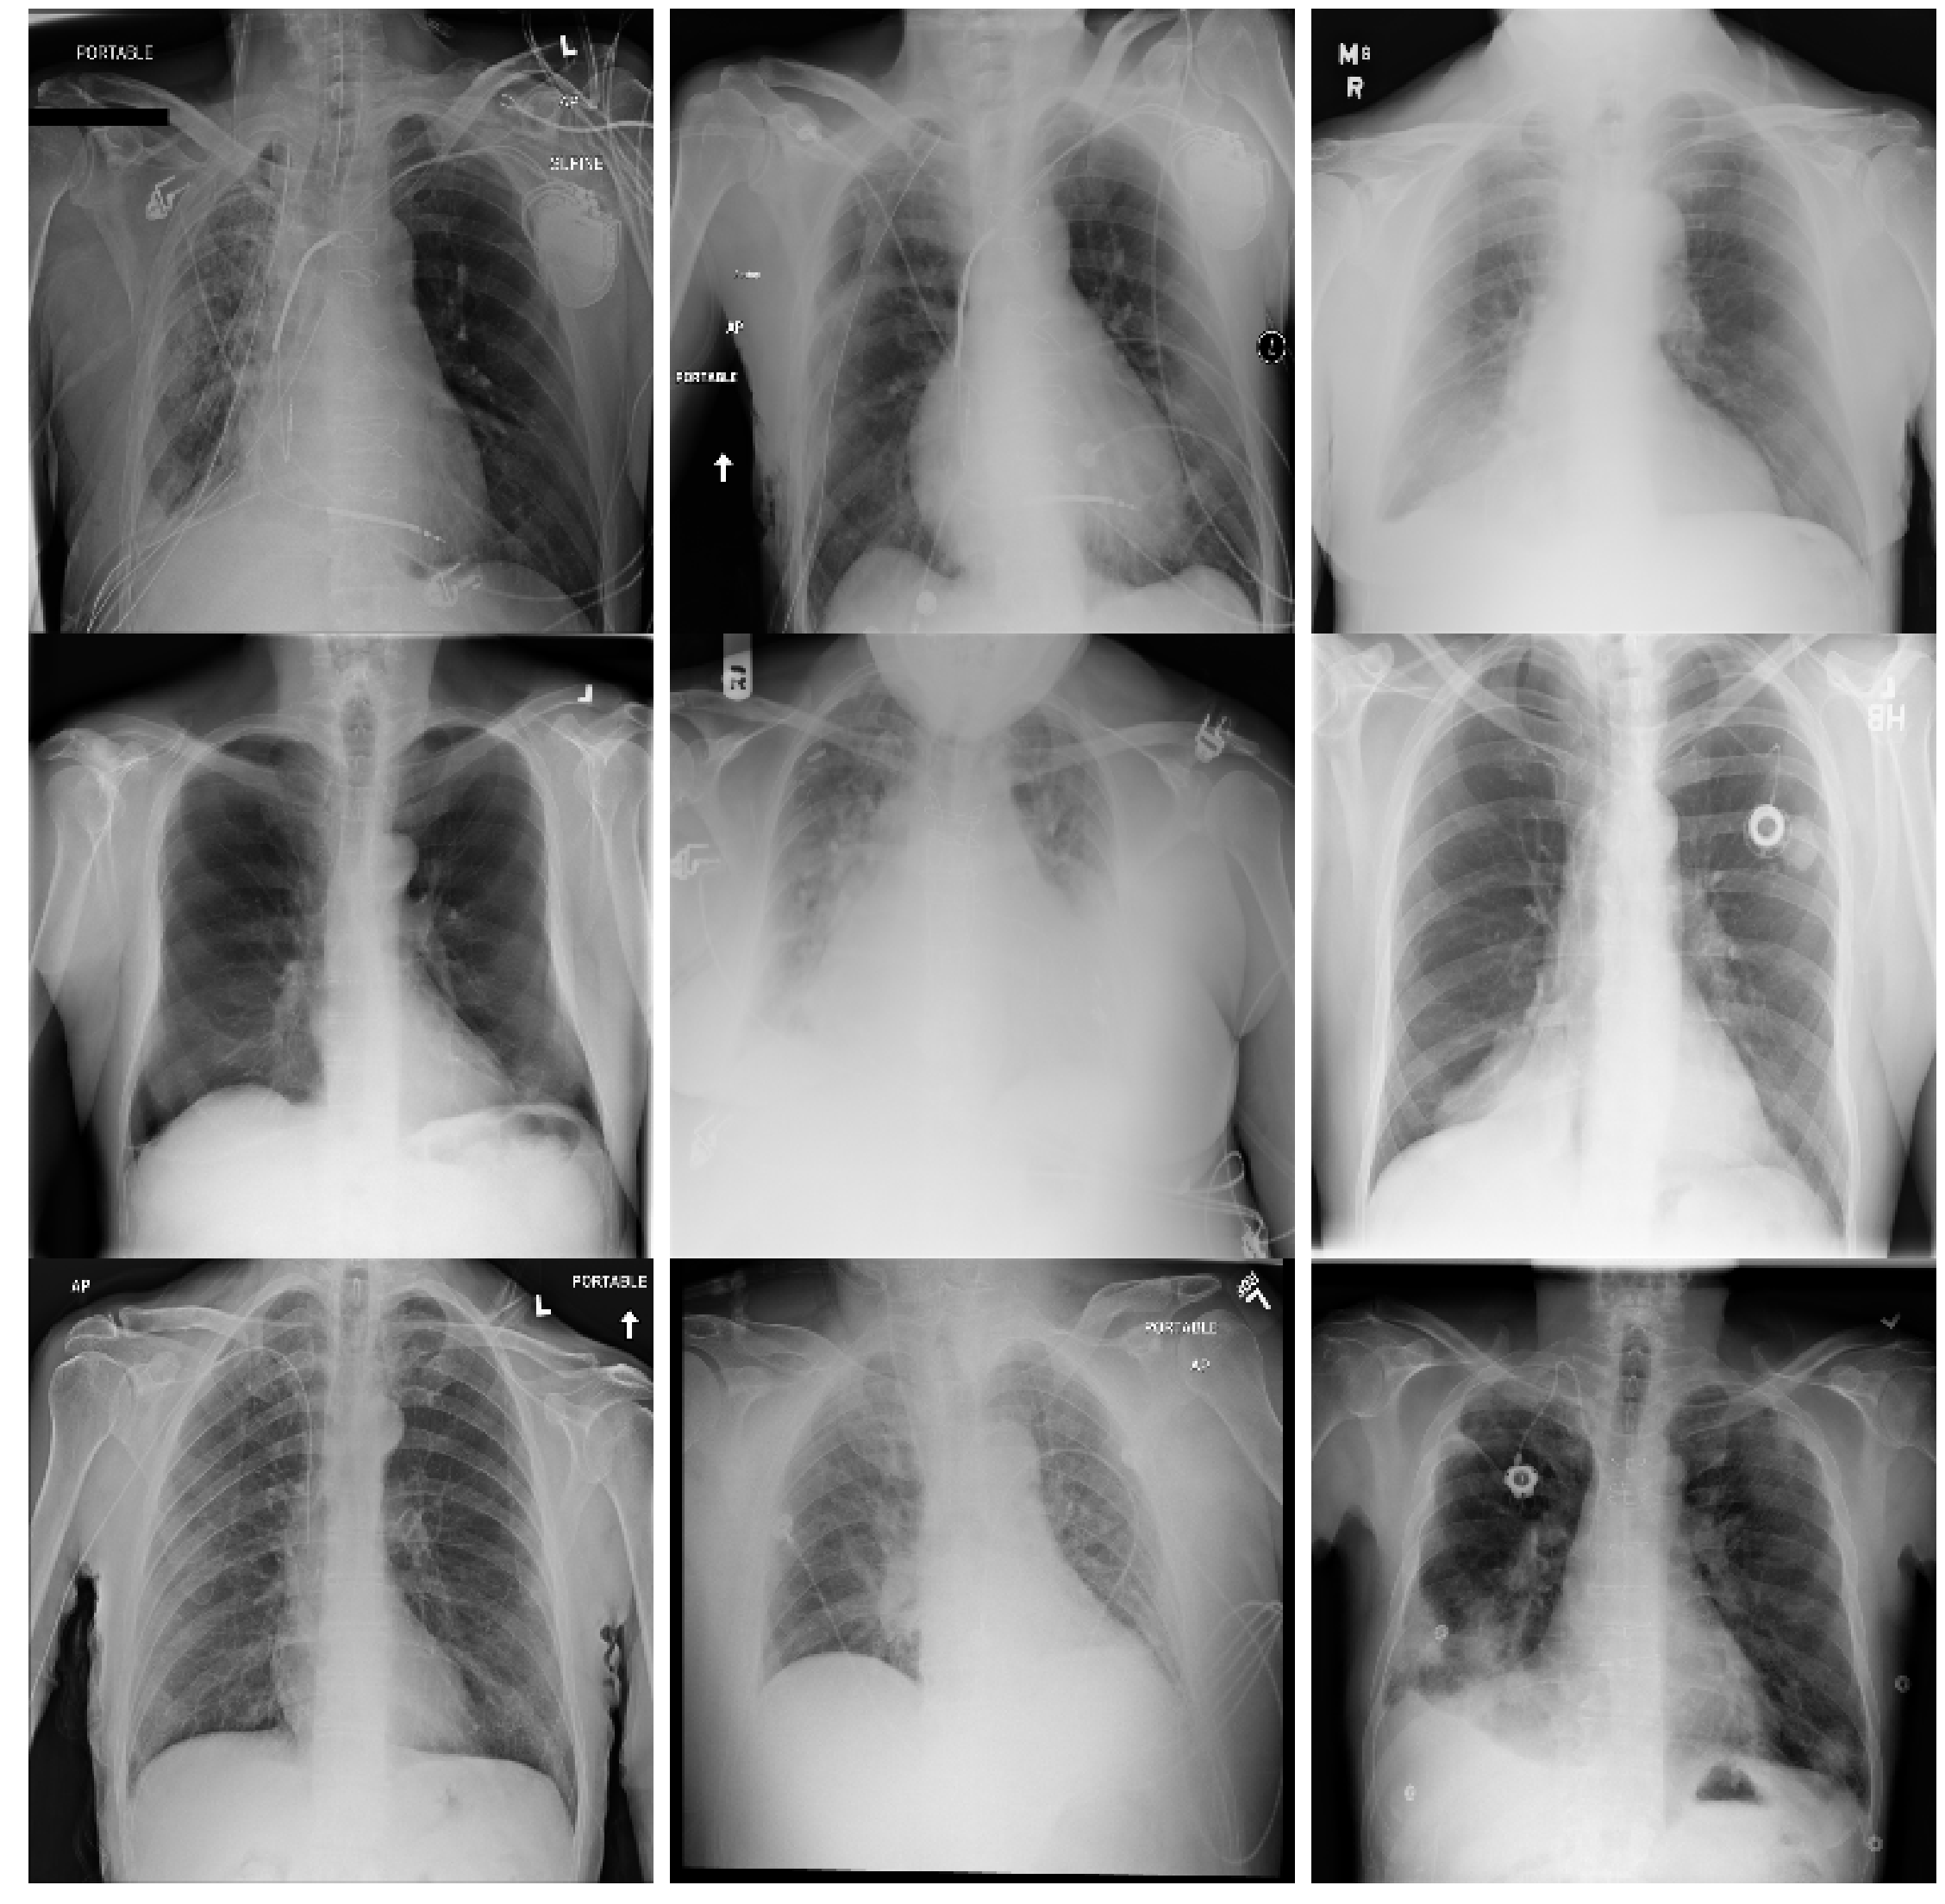

In [4]:
plt.rcParams['figure.figsize'] = (40.0,40.0)
plt.subplots_adjust(wspace = 0, hspace = 0)
i = 0
for img in list_images[:9]:
    im = cv2.imread(img)
    im = cv2.resize(im, (256,256))
    plt.subplot(3,3,i+1)
    plt.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB));
    plt.axis("off")
    i += 1

# Data distribution and sampling 

c:\python\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


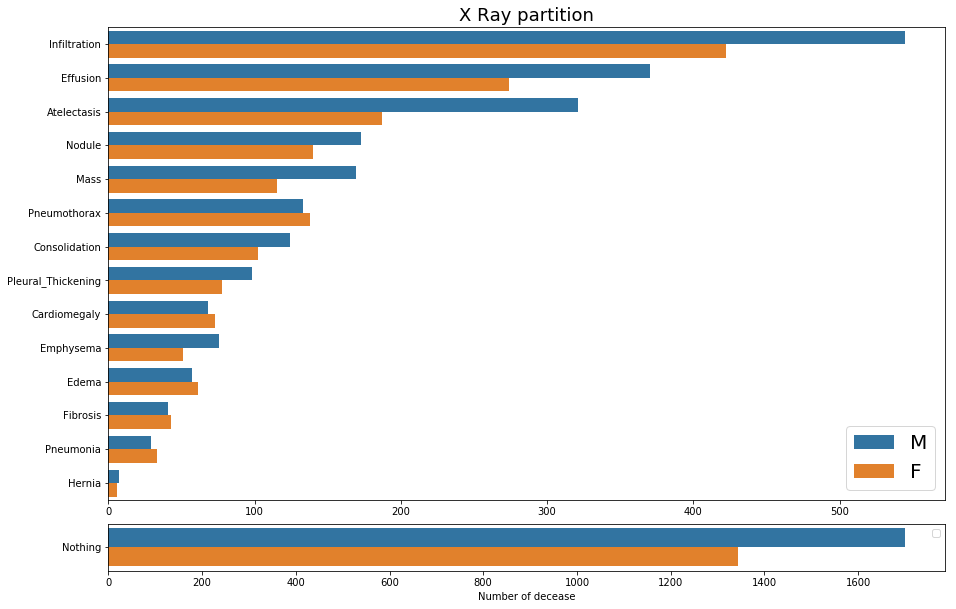

In [5]:
labels = df[['Image Index','Finding Labels','Follow-up #','Patient ID','Patient Age','Patient Gender']]

ailments = ['Cardiomegaly','Emphysema','Effusion','Hernia','Nodule','Pneumothorax','Atelectasis','Pleural_Thickening','Mass','Edema','Consolidation','Infiltration','Fibrosis','Pneumonia']

for ailment in ailments:
    labels[ailment] = labels['Finding Labels'].apply(lambda x: 1 if ailment in x else 0)
labels['Age'] = labels['Patient Age'].apply(lambda x: x[:-1]).astype(int)

plt.figure(figsize = (15,10))
gs = gridspec.GridSpec(8,1)
ax1 = plt.subplot(gs[:7, :])
ax2 = plt.subplot(gs[7, :])
data1 = pd.melt(labels,
             id_vars=['Patient Gender'],
             value_vars = list(ailments),
             var_name = 'Category',
             value_name = 'Count')
data1 = data1.loc[data1.Count>0]
g=sns.countplot(y='Category',hue='Patient Gender',data=data1, ax=ax1, order = data1['Category'].value_counts().index)
ax1.set( ylabel="",xlabel="")
ax1.legend(fontsize=20)
ax1.set_title('X Ray partition',fontsize=18);

labels['Nothing']=labels['Finding Labels'].apply(lambda x: 1 if 'No Finding' in x else 0)

data2 = pd.melt(labels,
             id_vars=['Patient Gender'],
             value_vars = list(['Nothing']),
             var_name = 'Category',
             value_name = 'Count')
data2 = data2.loc[data2.Count>0]
g=sns.countplot(y='Category',hue='Patient Gender',data=data2,ax=ax2)
ax2.set( ylabel="",xlabel="Number of decease")
ax2.legend('')
plt.subplots_adjust(hspace=.5)

In [6]:
labels = df
data=labels.groupby('Finding Labels').count().sort_values('Patient ID',ascending=False)
df1=data[['|' in index for index in data.index]].copy()
df2=data[['|' not in index for index in data.index]]

# Preprocessing: Redefining the labels with very low frequency for classification

In [7]:
def mergeLabels():
    """
    Returns two arrays: 
        x is an array of resized images
        y is an array of labels
    """
    NoFinding = "No Finding" 
    Consolidation="Consolidation" 
    Infiltration="Infiltration" 
    Pneumothorax="Pneumothorax" 
    Edema="Edema" 
    Emphysema="Emphysema" 
    Fibrosis="Fibrosis" 
    Effusion="Effusion" 
    Pneumonia="Pneumonia" 
    Pleural_Thickening="Pleural_Thickening" 
    Cardiomegaly="Cardiomegaly" 
    NoduleMass="Nodule" 
    Hernia="Hernia" 
    Atelectasis="Atelectasis"  
    RareClass = ["Edema", "Emphysema", "Fibrosis", "Pneumonia", "Pleural_Thickening", "Cardiomegaly","Hernia"]
    x = [] 
    y = []     
    WIDTH = 128
    HEIGHT = 128
    for img in list_images:
        base = os.path.basename(img)
        # Read and resize image
        full_size_image = cv2.imread(img)
        finding = df["Finding Labels"][df["Image Index"] == base].values[0]
        symbol = "|"
        if symbol in finding:
            continue
        else:
            if NoFinding in finding:
                finding = 0
                #y.append(finding)
                #x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))      
            elif Consolidation in finding:
                finding = 1
                y.append(finding)
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
            elif Infiltration in finding:
                finding = 2
                y.append(finding)
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
            elif Pneumothorax in finding:
                finding = 3
                y.append(finding)
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
            elif Edema in finding:
                finding = 7
                y.append(finding)
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
            elif Emphysema in finding:
                finding = 7
                y.append(finding)
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
            elif Fibrosis in finding:
                finding = 7
                y.append(finding)
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
            elif Effusion in finding:
                finding = 4
                y.append(finding)
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
            elif Pneumonia in finding:
                finding = 7
                y.append(finding)
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
            elif Pleural_Thickening in finding:
                finding = 7
                y.append(finding)
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
            elif Cardiomegaly in finding:
                finding = 7
                y.append(finding)
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
            elif NoduleMass in finding:
                finding = 5
                y.append(finding)
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
            elif Hernia in finding:
                finding = 7
                y.append(finding)
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
            elif Atelectasis in finding:
                finding = 6
                y.append(finding)
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
            else:
                continue
    return x,y

In [8]:
X, y = mergeLabels()
data_frame = pd.DataFrame()
data_frame["images"] = X
data_frame['labels'] = y
data_frame.head() 

,images,labels
0,"[[[36, 36, 36], [6, 6, 6], [5, 5, 5], [5, 5, 5...",6
1,"[[[126, 126, 126], [122, 122, 122], [119, 119,...",4
2,"[[[33, 33, 33], [30, 30, 30], [30, 30, 30], [3...",4
3,"[[[234, 234, 234], [220, 220, 220], [138, 138,...",4
4,"[[[255, 255, 255], [174, 174, 174], [69, 69, 6...",4


In [9]:
data_frame.info()
print(X[0].shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1483 entries, 0 to 1482
Data columns (total 2 columns):
images    1483 non-null object
labels    1483 non-null int64
dtypes: int64(1), object(1)
memory usage: 23.2+ KB
(128, 128, 3)


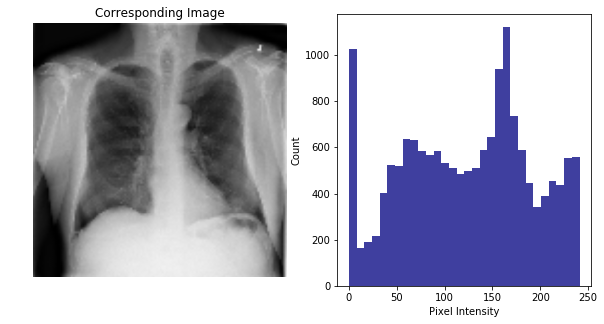

In [10]:
def drawHist(a):
    """
    Plot histogram of RGB Pixel Intensities
    """
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title('Corresponding Image')
    b = cv2.resize(a, (512,512))
    plt.imshow(b)
    plt.axis('off')
    histo = plt.subplot(1,2,2)
    histo.set_ylabel('Count')
    histo.set_xlabel('Pixel Intensity')
    n_bins = 30
    plt.hist(a[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
    plt.hist(a[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
    plt.hist(a[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);
drawHist(X[0])

# Normalize intensity

In [11]:
new_labels = {1: 'Consolidation', 2: 'Infiltration', 
        3: 'Pneumothorax', 4:'Effusion', 5: 'Nodule Mass', 6: 'Atelectasis', 7: "Other Rare Classes"}
X = np.array(X)
y = np.array(y)
X = X / 255

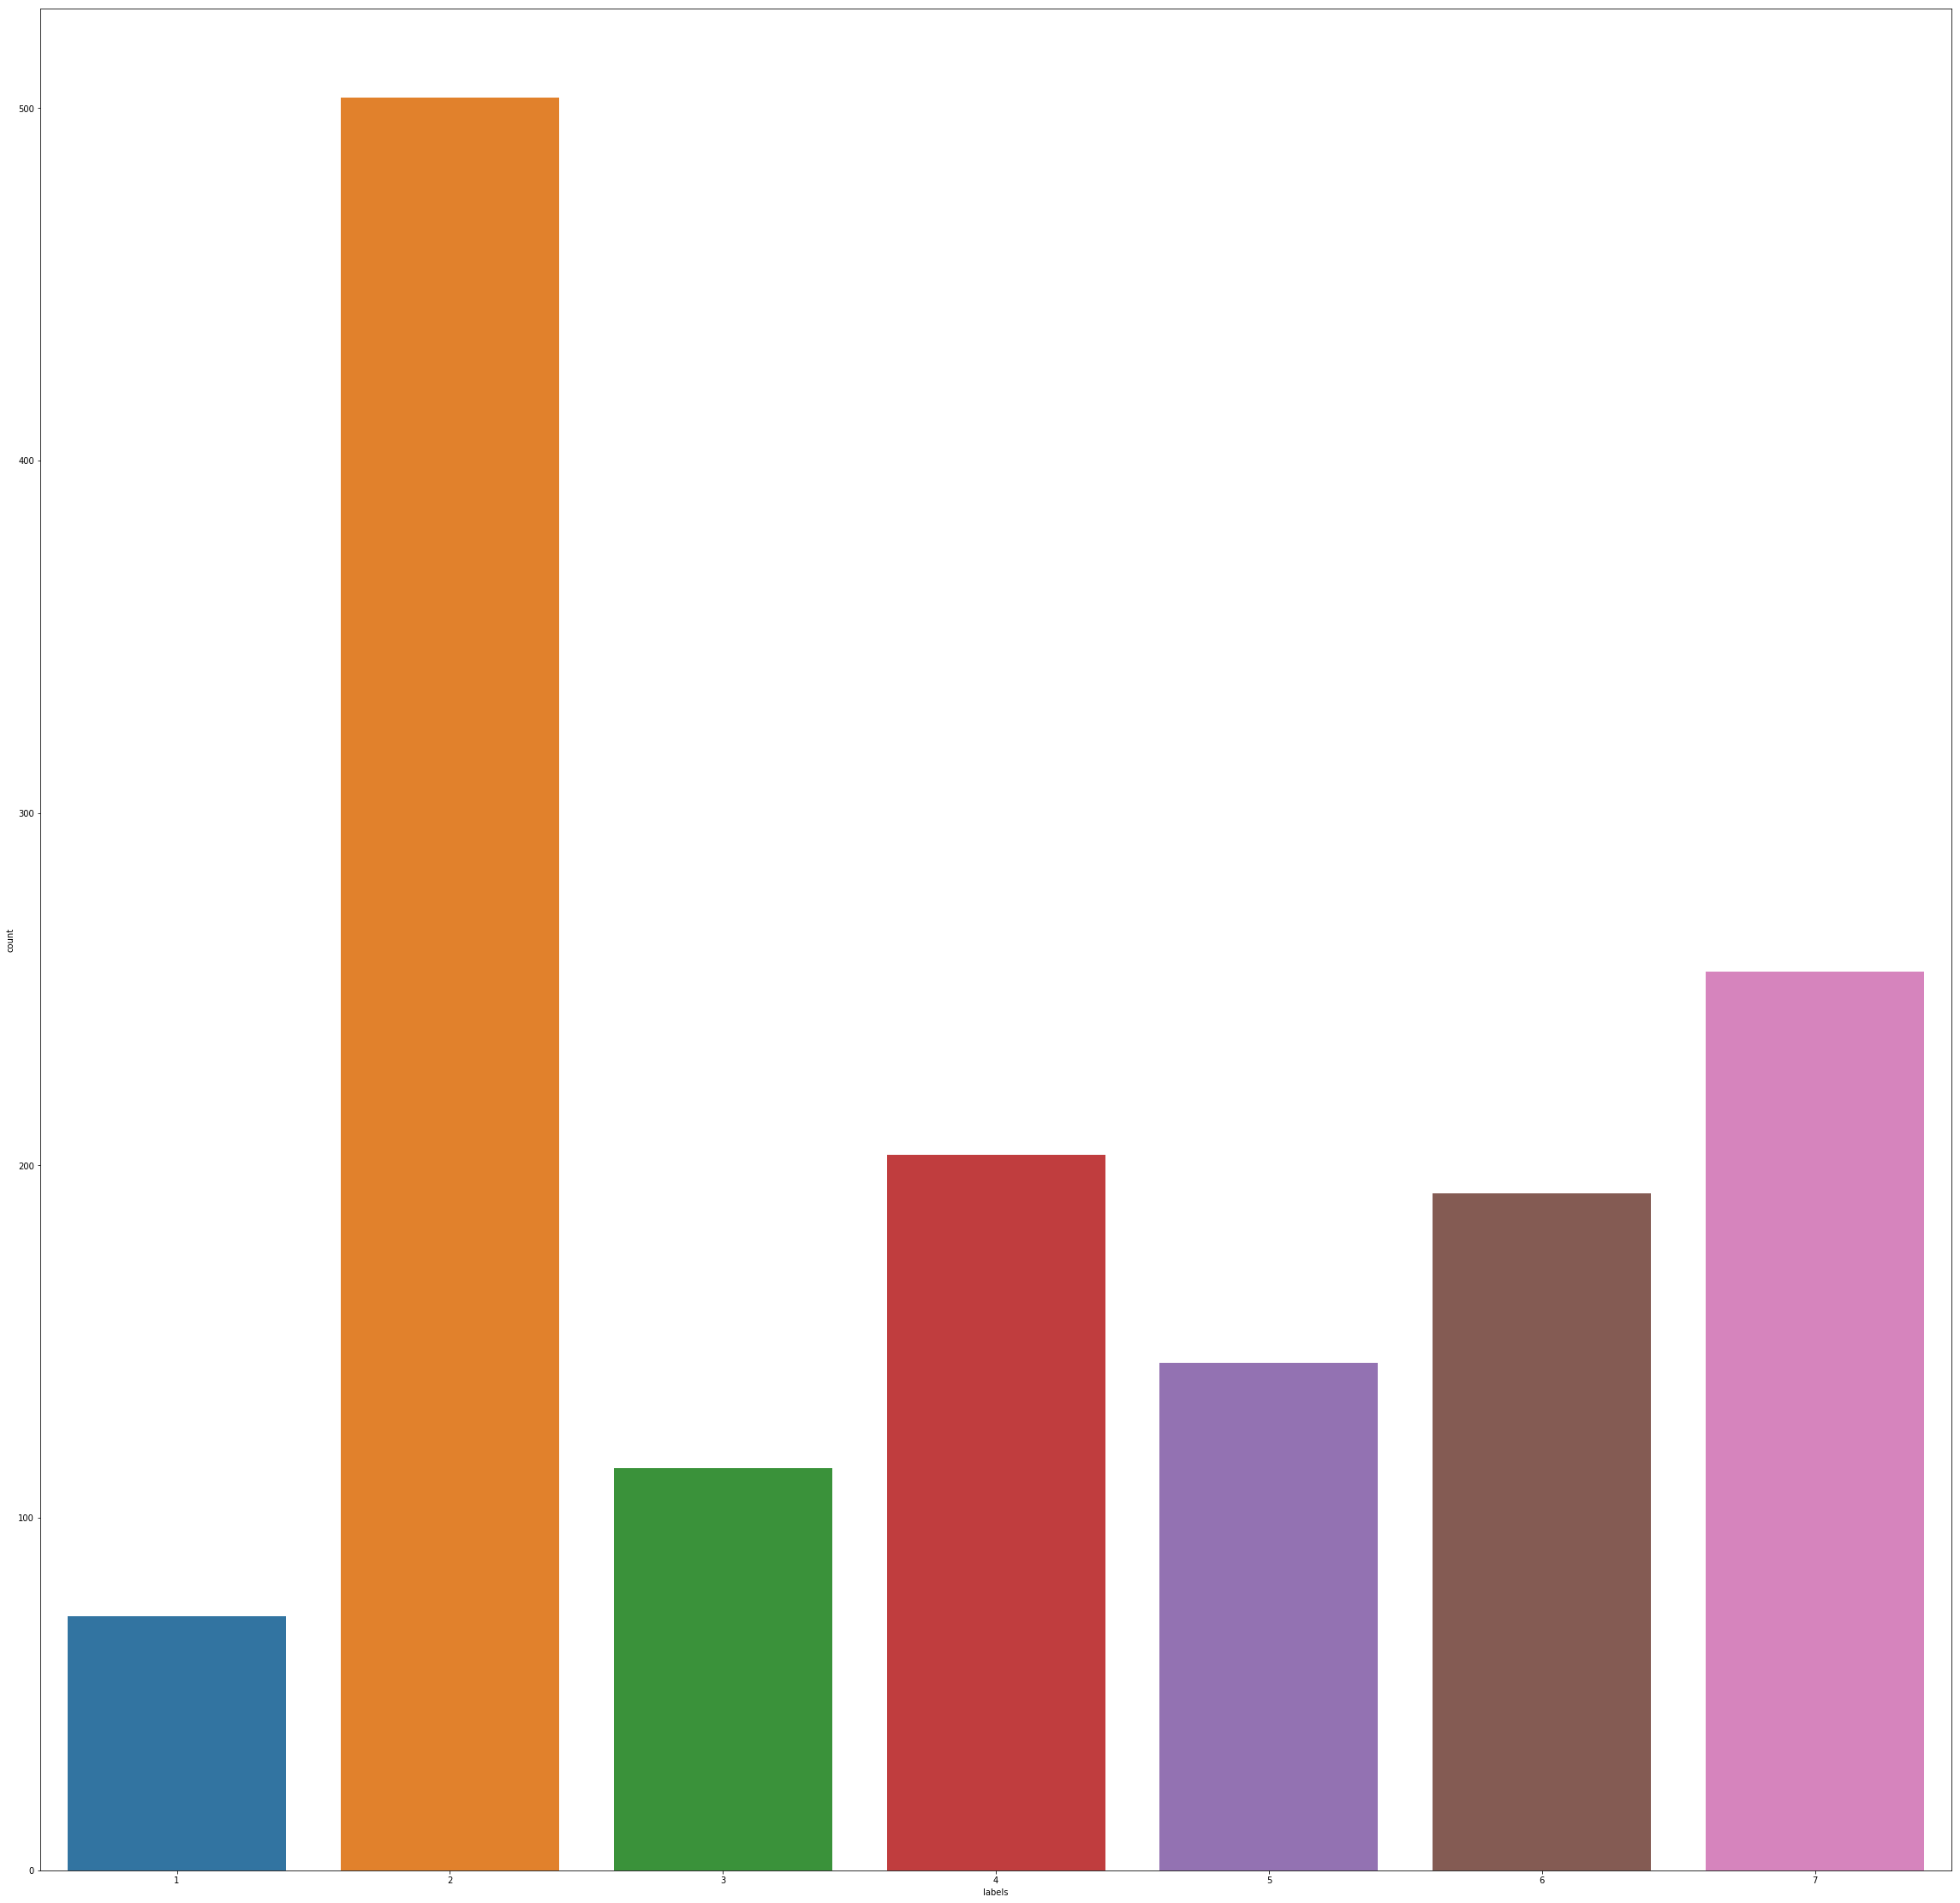

In [12]:
classes = data_frame['labels']
sns.countplot(classes)

# Splitting train and test data

In [16]:
from sklearn.utils import class_weight 
from keras.utils import to_categorical
class_weights = class_weight.compute_class_weight('balanced',np.unique(y),y)
print(class_weights)
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
y_train_onehot = to_categorical(y_train,num_classes = 8)
y_test_onehot = to_categorical(y_test,num_classes = 8)

[2.94246032 0.42118716 1.85839599 1.04363125 1.47123016 1.10342262
 0.83081232]
(1186, 128, 128, 3)
(297, 128, 128, 3)
(1186,)
(297,)


# Convolution Neural Network

In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten,BatchNormalization,Activation
from keras.callbacks import TensorBoard
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD, Adam, RMSprop
#Begin defining CNN

BATCH_SIZE = 64
NUM_CLASSES = 8
EPOCHS = 10

input_dim = (128,128,3)

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',
                activation = 'relu', input_shape = input_dim, strides = 1))
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same',activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same',activation = 'relu'))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 512, kernel_size = (3,3),padding = 'Same',activation = 'relu'))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 1024, kernel_size = (3,3),padding = 'Same',activation = 'relu'))
model.add(Conv2D(filters = 1024, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(4096,activation = 'relu'))
model.add(Dense(NUM_CLASSES, activation = 'softmax'))

#opt = SGD(lr=1e-4)
#opt = Adam(lr = 0.0003)
opt = RMSprop(lr = 0.001)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['acc'])

print(model.summary())

c:\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 128)       73856     
__________

In [14]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))

        # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')

        # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
    
def train_cnn(X_train,X_test,y_train,y_test):
    datagen = ImageDataGenerator(featurewise_center = False,
                                samplewise_center = True,
                                featurewise_std_normalization = False,
                                samplewise_std_normalization = False,
                                zca_whitening = False,
                                rotation_range = 40,
                                width_shift_range = 0.4,
                                height_shift_range = 0.4,
                                horizontal_flip = True,
                                vertical_flip = False)
    datagen.fit(X_train)
    history = model.fit_generator(datagen.flow(X_train,y_train,batch_size = 64),
                        epochs = EPOCHS,
                       class_weight = class_weights,
                       validation_data = [X_train[:100],y_train[:100]], verbose = 1)
    score = model.evaluate(X_test,X_test,verbose = 1)
    plot_model_history(history)
    print(score[1])
    return model, score[1]


# Over-sampling data

In [39]:
X_trainShape = X_train.shape[1]*X_train.shape[2]*X_train.shape[3]
X_testShape = X_test.shape[1]*X_test.shape[2]*X_test.shape[3]
X_trainFlat = X_train.reshape(X_train.shape[0], X_trainShape)
X_testFlat = X_test.reshape(X_test.shape[0], X_testShape)

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(ratio='auto')
X_trainRos, Y_trainRos = ros.fit_sample(X_trainFlat, y_train)
X_testRos, Y_testRos = ros.fit_sample(X_testFlat, y_test)

# Encode labels to hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_trainRosHot = to_categorical(Y_trainRos, num_classes = 8)
Y_testRosHot = to_categorical(Y_testRos, num_classes = 8)

for i in range(len(X_trainRos)):
    height, width, channels = 128,128,3
    X_trainRosReshaped = X_trainRos.reshape(len(X_trainRos),height,width,channels)
print("X_trainRos Shape: ",X_trainRos.shape)
print("X_trainRosReshaped Shape: ",X_trainRosReshaped.shape)

for i in range(len(X_testRos)):
    height, width, channels = 128,128,3
    X_testRosReshaped = X_testRos.reshape(len(X_testRos),height,width,channels)

model, accuracy = train_cnn(X_trainRosReshaped,X_testRosReshaped,Y_trainRosHot,Y_testRosHot)

X_trainRos Shape:  (2842, 49152)
X_trainRosReshaped Shape:  (2842, 128, 128, 3)
Epoch 1/150
45/45 [==============================] - 15s 335ms/step - loss: 2.0031 - acc: 0.1684 - val_loss: 2.0443 - val_acc: 0.1429
Epoch 2/150
45/45 [==============================] - 13s 294ms/step - loss: 1.9382 - acc: 0.1831 - val_loss: 2.0431 - val_acc: 0.1429
Epoch 3/150
45/45 [==============================] - 14s 306ms/step - loss: 1.9151 - acc: 0.1999 - val_loss: 2.0289 - val_acc: 0.1502
Epoch 4/150
45/45 [==============================] - 14s 306ms/step - loss: 1.9008 - acc: 0.2196 - val_loss: 2.0102 - val_acc: 0.1671
Epoch 5/150
45/45 [==============================] - 15s 340ms/step - loss: 1.8910 - acc: 0.2148 - val_loss: 1.9999 - val_acc: 0.1999
Epoch 6/150
45/45 [==============================] - 15s 339ms/step - loss: 1.8803 - acc: 0.2336 - val_loss: 1.9896 - val_acc: 0.1890
Epoch 7/150
45/45 [==============================] - 16s 349ms/step - loss: 1.8794 - acc: 0.2293 - val_loss: 1.9768 

45/45 [==============================] - 14s 322ms/step - loss: 0.9789 - acc: 0.6347 - val_loss: 4.4591 - val_acc: 0.2389
Epoch 122/150
45/45 [==============================] - 15s 337ms/step - loss: 0.9416 - acc: 0.6594 - val_loss: 4.7704 - val_acc: 0.2628
Epoch 123/150
45/45 [==============================] - 14s 313ms/step - loss: 0.9417 - acc: 0.6496 - val_loss: 5.4854 - val_acc: 0.2108
Epoch 124/150
45/45 [==============================] - 13s 296ms/step - loss: 0.9432 - acc: 0.6620 - val_loss: 3.5784 - val_acc: 0.2660
Epoch 125/150
45/45 [==============================] - 13s 298ms/step - loss: 0.9129 - acc: 0.6555 - val_loss: 4.2953 - val_acc: 0.2555
Epoch 126/150
45/45 [==============================] - 13s 299ms/step - loss: 0.9125 - acc: 0.6664 - val_loss: 5.2813 - val_acc: 0.2020
Epoch 127/150
45/45 [==============================] - 14s 301ms/step - loss: 0.9069 - acc: 0.6676 - val_loss: 3.7051 - val_acc: 0.3139
Epoch 128/150
45/45 [==============================] - 13s 296

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

pred = model.predict(X_testRosReshaped)
print(classification_report(Y_testRosHot,pred))
print(X_trainRos.shape)
print(X_testRos.shape)
print(Y_trainRos.shape)
print(Y_testRos.shape)


# Fitting other models: Support Vector Machines

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
clf = SVC(kernel = 'linear',C = 0.01)

param_grid = {
    'C' : [0.01,0.1],
     'gamma' : [0.01,1,0.001]
}
clf = GridSearchCV(SVC(), param_grid,cv = 4).fit(X_trainRos,Y_trainRos)
#clf.fit(X_trainRos,Y_trainRos)
pred = clf.predict(X_testRos)
print("Accuracy",accuracy_score(Y_testRos,pred)*100)
print(classification_report(Y_testRos,pred))

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [20,30,50,70],
    'criterion' : ['gini','entropy']
}

#clf = GridSearchCV(RandomForestClassifier(), param_grid, cv = 4).fit(X_trainRos,Y_trainRos)
clf = RandomForestClassifier()
pred = clf.predict(X_testRos)
print("Accuracy",accuracy_score(Y_testRos,pred)*100)
print(classification_report(Y_testRos,pred))